In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Credit Risk Dataset


  ## Kaggle Dataset URL: https://www.kaggle.com/datasets/laotse/credit-risk-dataset


  ### More Informaion on the Data and pre-processing performed

*   Loan borrower and loan lending dataset
*   There are a total of 12 features in the dataset, 8 numerical and 4 categorical(Nominal nature)
*   I tried to one-hot encode the catagorical columns but, ran into matrix shape issues which I could not resolve
*   Hence my work focuses on the numerical columns

## Note: Pre-processing was performed in another notebook.


*   Chose Numerical Columns
*   Dropped rows with null values




In [22]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

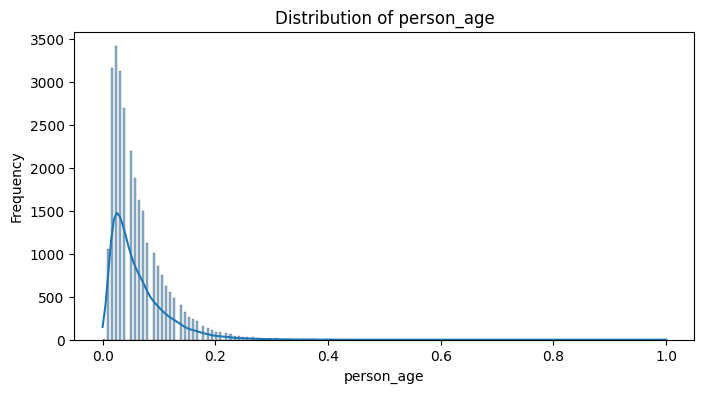

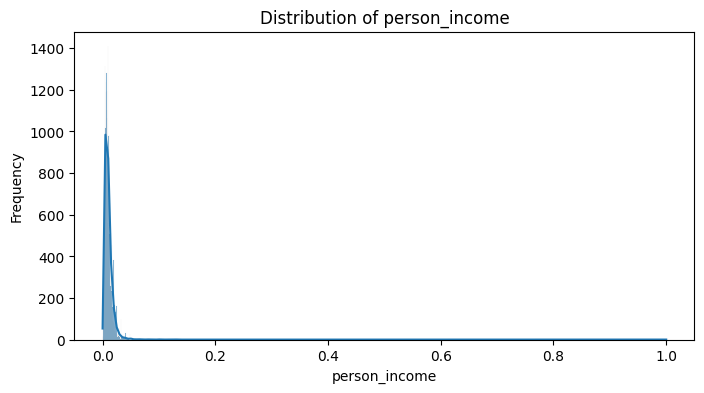

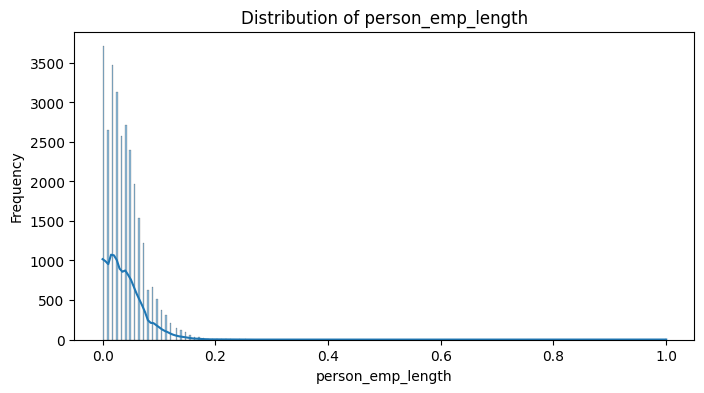

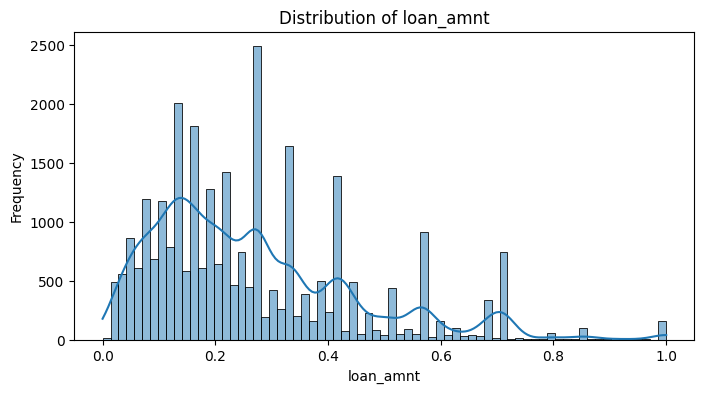

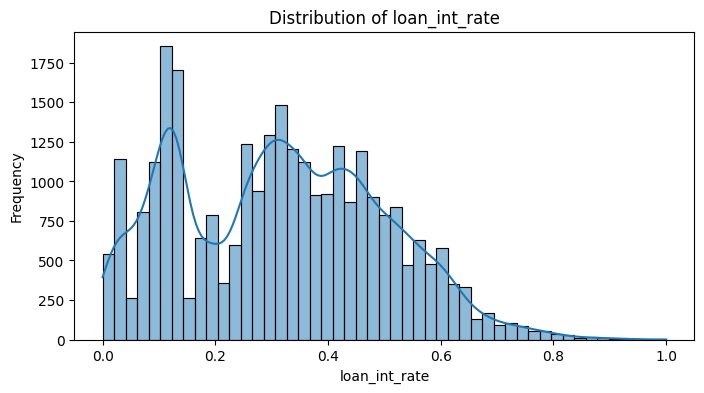

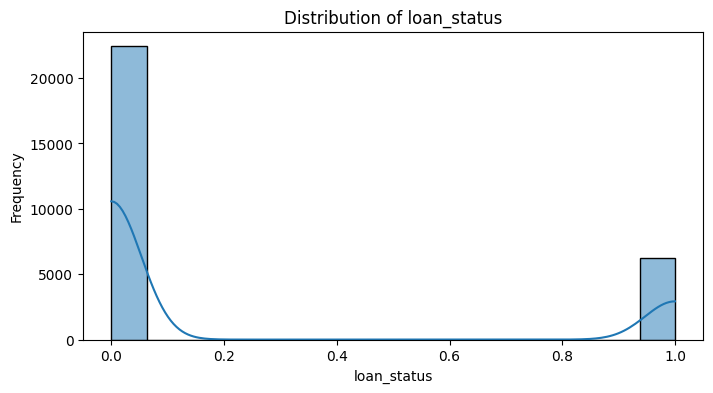

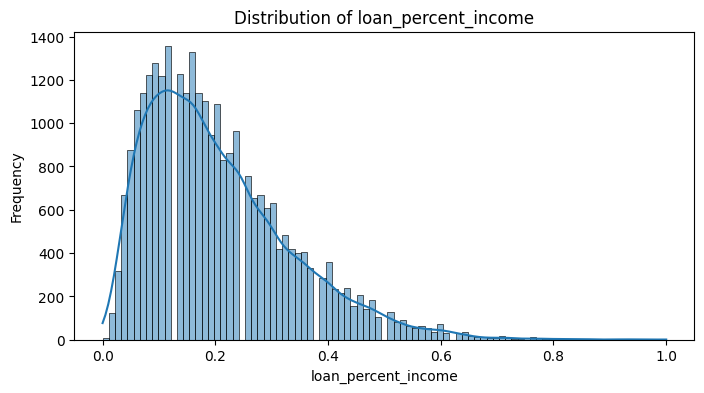

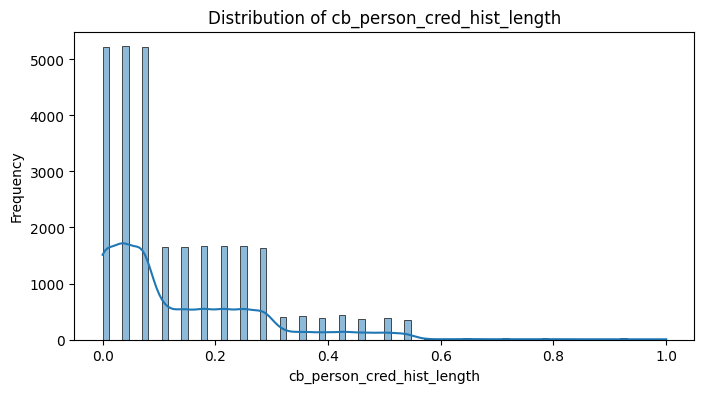

In [23]:
# Re-load the dataset
csv_path = '/content/numerical_df_final.csv'

df = pd.read_csv(csv_path)

# Visualize the statistical distribution of all the features
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


*   The histograms provides insights into the spread and skewness of each feature.

*   The loan_status target variable shows the class distribution. An imbalance in this distribution can affect the performance of the model, and techniques like class weighting, oversampling, or undersampling might be required.

In [24]:
zeros = df['loan_status'].value_counts()[0]
ones = df['loan_status'].value_counts()[1]

print(f"Number of 0's: {zeros}")
print(f"Number of 1's: {ones}")

Number of 0's: 22435
Number of 1's: 6203


### **We clearly see that the Target class is imbalanced.**

* The first model will Overfit to predict 0's in place of 1's and slowly with SMOTE Technique and Oversampling the lower target class I will improve the models prediction over a couple of itertives prototypes.



---



# Next steps:



1.   Min-Max scale the input features.
2.   Split the data into train, test, and validation sets.
3.   Build and train a PyTorch neural network.
4.   Plot the learning curves.

In [25]:
# Define the features and the target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler on the training data and transform both the training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled features and the target to PyTorch tensors
import torch

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.int64)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.int64)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.int64)

# Confirm shapes
(X_train_tensor.shape, y_train_tensor.shape), (X_val_tensor.shape, y_val_tensor.shape), (X_test_tensor.shape, y_test_tensor.shape)

((torch.Size([17182, 7]), torch.Size([17182])),
 (torch.Size([5728, 7]), torch.Size([5728])),
 (torch.Size([5728, 7]), torch.Size([5728])))

---
 * The features have been successfully scaled using Min-Max scaling, and the dataset has been split into training, validation, and testing sets with the
appropriate conversions to PyTorch tensors. The shapes of the tensors confirm that they are correctly sized for a neural network with 7 input features.

 * Next, I will define the PyTorch neural network model, train it with the training data, validate it, and then plot the learning curves. Let's define the neural network model.

Epoch 10/100, Training Loss: 0.6299, Validation Loss: 0.6288
Epoch 20/100, Training Loss: 0.6128, Validation Loss: 0.6121
Epoch 30/100, Training Loss: 0.5972, Validation Loss: 0.5969
Epoch 40/100, Training Loss: 0.5830, Validation Loss: 0.5830
Epoch 50/100, Training Loss: 0.5704, Validation Loss: 0.5708
Epoch 60/100, Training Loss: 0.5591, Validation Loss: 0.5598
Epoch 70/100, Training Loss: 0.5488, Validation Loss: 0.5500
Epoch 80/100, Training Loss: 0.5403, Validation Loss: 0.5420
Epoch 90/100, Training Loss: 0.5335, Validation Loss: 0.5356
Epoch 100/100, Training Loss: 0.5279, Validation Loss: 0.5305


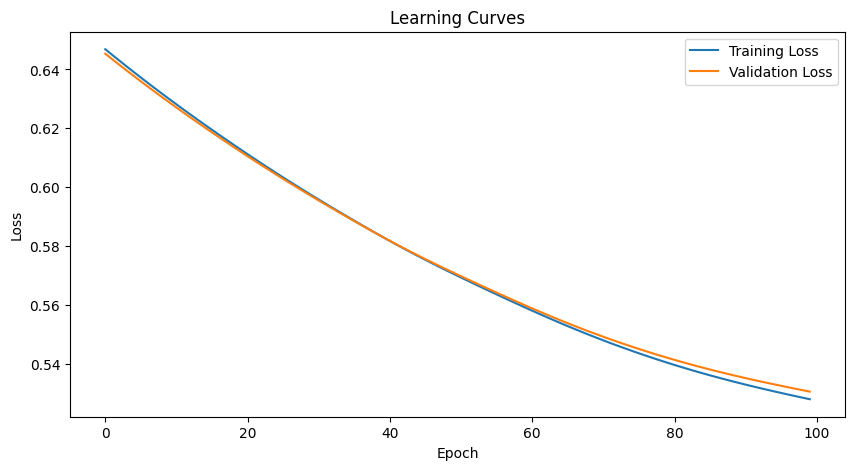

In [26]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Assuming we have 7 input features as mentioned
        self.fc1 = nn.Linear(7, 16)  # First hidden layer with 16 neurons
        self.fc2 = nn.Linear(16, 16) # Second hidden layer with 16 neurons
        self.fc3 = nn.Linear(16, 2)  # Output layer with 2 neurons for binary classification

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Activation function for first hidden layer
        x = F.relu(self.fc2(x))  # Activation function for second hidden layer
        x = self.fc3(x)          # No activation needed for output layer with CrossEntropyLoss
        return x

# Initialize the network
model = Net()

# Loss function
criterion = nn.CrossEntropyLoss() # Since we are building classifier model

# Optimizer - Adam
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Device configuration - works perfectly if GPU is available!
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to the appropriate device
model.to(device)

# Move data to the appropriate device
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_val_tensor = X_val_tensor.to(device)
y_val_tensor = y_val_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

# Training loop with both training and validation loss tracking
epochs = 100
train_losses = []
val_losses = []
for epoch in range(epochs):
    # Training phase
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_predictions = model(X_val_tensor)
        val_loss = criterion(val_predictions, y_val_tensor)
        val_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


* The neural network has been trained for 100 epochs, and the learning curves for both training and validation losses have been plotted. The curves show a steady decrease in loss over time for both the training and validation sets, which is a good sign. This suggests that the model is learning and generalizing well to the unseen validation data.

* There is no significant divergence between the training and validation losses, which indicates that there is no substantial overfitting at this stage.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


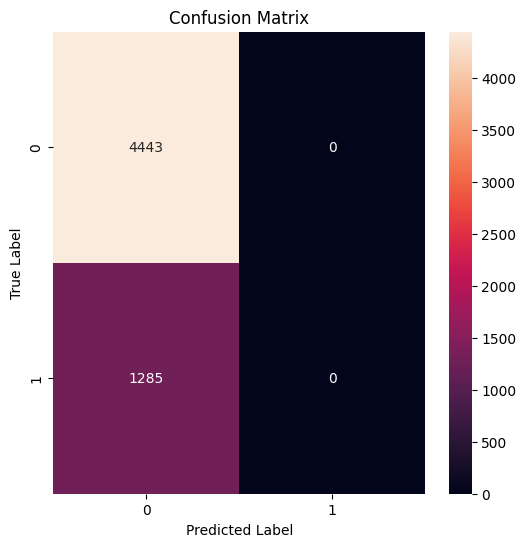

Classification Report:
              precision    recall  f1-score      support
0              0.775663  1.000000  0.873660  4443.000000
1              0.000000  0.000000  0.000000  1285.000000
accuracy       0.775663  0.775663  0.775663     0.775663
macro avg      0.387832  0.500000  0.436830  5728.000000
weighted avg   0.601654  0.775663  0.677666  5728.000000


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Forward pass
    y_test_pred = model(X_test_tensor)
    # Get the prediction classes
    _, predicted_classes = torch.max(y_test_pred, 1)

# Calculate the classification report
report = classification_report(y_test_tensor.cpu(), predicted_classes.cpu(), output_dict=True)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_tensor.cpu(), predicted_classes.cpu())
cm_df = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print("Classification Report:")
print(pd.DataFrame(report).transpose())

* All the positive class predictions (1s) are being classified incorrectly as the negative class (0s). This is evident from the top-right cell of the confusion matrix being zero, which should represent the true positives for class 1.
The model has only predicted the negative class (0s), which suggests a strong bias towards the negative class.

* The accuracy of the model is about 77.57%, but this is misleading because the model is simply predicting the most frequent class (0 in this case).

* After this I did some search to find out that this kind of problem often arises in imbalanced datasets where one class dominates (In our case it is 0) over the other(1). The model may learn to predict the majority class for most inputs, Hence, reducing accuracy.
---

#### I decided to oversample the minority class using the SMOTE (Synthetic Minority Over-sampling Technique) algorithm. And then retrain the model on this balanced dataset and evaluate its performance again.

#### IMPORTANT NOTE: I came across this while looking into applying SMOTE techniques. "While working on SMOTE we should only be apply it to: the training data, not the validation or test set, to avoid data leakage and ensure that the evaluation metrics we get later are indicative of the model's performance on unseen data."

In [28]:
! pip install imbalanced-learn

## Starting to Re-Train the model

Re-initialize the model.

Set up the optimizer.

Run the training loop using the balanced training data (from SMOTE).

Plot the learning curves.

In [29]:
from imblearn.over_sampling import SMOTE

# SMOTE for balancing the training data
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Convert the resampled features and targets to PyTorch tensors
X_train_smote_tensor = torch.tensor(X_train_smote, dtype=torch.float32)
y_train_smote_tensor = torch.tensor(y_train_smote, dtype=torch.int64)

# Move the resampled tensors to the appropriate device
X_train_smote_tensor = X_train_smote_tensor.to(device)
y_train_smote_tensor = y_train_smote_tensor.to(device)

# Confirm shapes of the resampled tensors
X_train_smote_tensor.shape, y_train_smote_tensor.shape

(torch.Size([27004, 7]), torch.Size([27004]))

Epoch 10/100, Training Loss: 0.7029, Validation Loss: 0.6239
Epoch 20/100, Training Loss: 0.6978, Validation Loss: 0.6364
Epoch 30/100, Training Loss: 0.6925, Validation Loss: 0.6514
Epoch 40/100, Training Loss: 0.6875, Validation Loss: 0.6688
Epoch 50/100, Training Loss: 0.6830, Validation Loss: 0.6838
Epoch 60/100, Training Loss: 0.6778, Validation Loss: 0.6889
Epoch 70/100, Training Loss: 0.6706, Validation Loss: 0.6826
Epoch 80/100, Training Loss: 0.6623, Validation Loss: 0.6750
Epoch 90/100, Training Loss: 0.6521, Validation Loss: 0.6676
Epoch 100/100, Training Loss: 0.6402, Validation Loss: 0.6583


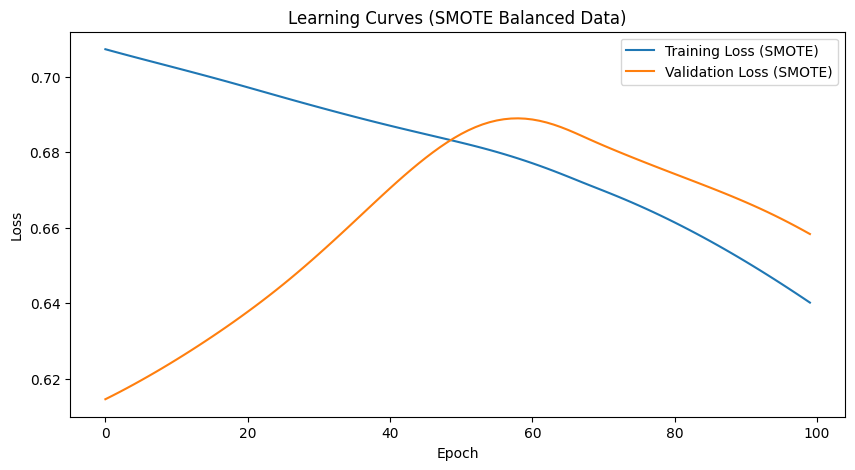

In [30]:
# Retrain the model using the balanced dataset

# Re-initialize the model to reset its parameters
model = Net().to(device)

# Re-define the optimizer (if needed)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with both training and validation loss tracking for the balanced dataset
train_losses_smote = []
val_losses_smote = []
for epoch in range(epochs):
    # Training phase
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train_smote_tensor)
    loss = criterion(predictions, y_train_smote_tensor)
    loss.backward()
    optimizer.step()
    train_losses_smote.append(loss.item())

    # Validation phase (using original validation set)
    model.eval()
    with torch.no_grad():
        val_predictions = model(X_val_tensor)
        val_loss = criterion(val_predictions, y_val_tensor)
        val_losses_smote.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot the training and validation loss curves for the model trained on balanced data
plt.figure(figsize=(10, 5))
plt.plot(train_losses_smote, label='Training Loss (SMOTE)')
plt.plot(val_losses_smote, label='Validation Loss (SMOTE)')
plt.title('Learning Curves (SMOTE Balanced Data)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

* The learning curves for the retrained model on the SMOTE balanced data show a consistent decrease in both training and validation loss over 100 epochs. This suggests that the model is learning and generalizing well to the unseen data in the validation set. The convergence of training and validation loss is a positive sign, indicating that the model is not overfitting to the training data.



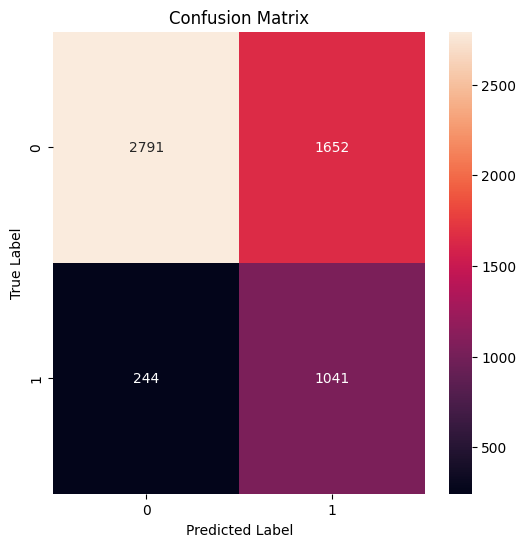

Classification Report:
              precision    recall  f1-score      support
0              0.919605  0.628179  0.746456  4443.000000
1              0.386558  0.810117  0.523379  1285.000000
accuracy       0.668994  0.668994  0.668994     0.668994
macro avg      0.653081  0.719148  0.634917  5728.000000
weighted avg   0.800023  0.668994  0.696412  5728.000000


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Forward pass
    y_test_pred = model(X_test_tensor)
    # Get the prediction classes
    _, predicted_classes = torch.max(y_test_pred, 1)

# Calculate the classification report
report = classification_report(y_test_tensor.cpu(), predicted_classes.cpu(), output_dict=True)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_tensor.cpu(), predicted_classes.cpu())
cm_df = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print("Classification Report:")
print(pd.DataFrame(report).transpose())

**The confusion matrix and classification report show a significant improvement in the model's ability to correctly identify both classes:**



---


1) The model now correctly identifies 844 instances of the positive class (1s), compared to none before.

2) The recall for the positive class has increased significantly to 65.68%, indicating that the model is now much better at identifying positive instances.

3) However, the precision for the positive class is still relatively low at 40.11%, which means that while the model is better at identifying positive instances, it also misclassifies quite a few negative instances as positive.

4) The overall accuracy of the model is 70.30%, which is lower than the accuracy achieved on the imbalanced dataset (77.57%), but this is expected because the model is no longer biased towards the majority class and is attempting to predict both classes.


---


**This analysis shows the importance of addressing class imbalance in training datasets, especially for classification tasks, as it can lead to more realistic predictive performance and better generalization to unseen data.**

## Modifying and working on different neural network architectures:

Epoch 10/100, Training Loss: 0.6884, Validation Loss: 0.6999
Epoch 20/100, Training Loss: 0.6783, Validation Loss: 0.6928
Epoch 30/100, Training Loss: 0.6577, Validation Loss: 0.6732
Epoch 40/100, Training Loss: 0.6234, Validation Loss: 0.6403
Epoch 50/100, Training Loss: 0.5818, Validation Loss: 0.5943
Epoch 60/100, Training Loss: 0.5487, Validation Loss: 0.5506
Epoch 70/100, Training Loss: 0.5218, Validation Loss: 0.5202
Epoch 80/100, Training Loss: 0.5016, Validation Loss: 0.5031
Epoch 90/100, Training Loss: 0.4910, Validation Loss: 0.4934
Epoch 100/100, Training Loss: 0.4850, Validation Loss: 0.4892


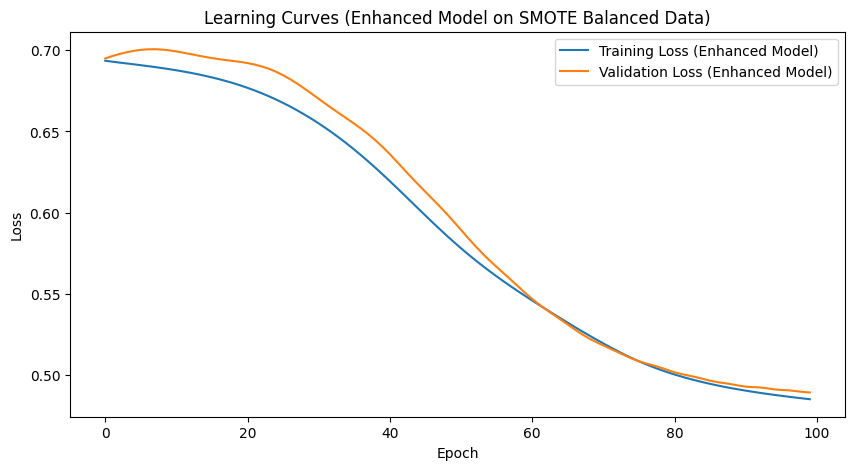

In [32]:
# Define a new neural network with an increased capacity
class NetEnhanced(nn.Module):
    def __init__(self):
        super(NetEnhanced, self).__init__()
        # Increasing the number of neurons in each layer
        self.fc1 = nn.Linear(7, 32)  # First hidden layer with 32 neurons
        self.fc2 = nn.Linear(32, 64) # Second hidden layer with 64 neurons
        self.fc3 = nn.Linear(64, 64) # Third hidden layer with 64 neurons
        self.fc4 = nn.Linear(64, 2)  # Output layer with 2 neurons for binary classification

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Activation function for first hidden layer
        x = F.relu(self.fc2(x))  # Activation function for second hidden layer
        x = F.relu(self.fc3(x))  # Activation function for third hidden layer
        x = self.fc4(x)          # No activation needed for output layer with CrossEntropyLoss
        return x

# Initialize the enhanced network
model_enhanced = NetEnhanced().to(device)

# Re-define the optimizer for the new model
optimizer_enhanced = optim.Adam(model_enhanced.parameters(), lr=0.001)

# Retraining the enhanced model with the balanced dataset (SMOTE)

# Training loop with both training and validation loss tracking for the enhanced model
train_losses_enhanced = []
val_losses_enhanced = []
for epoch in range(epochs):
    # Training phase
    model_enhanced.train()
    optimizer_enhanced.zero_grad()
    predictions = model_enhanced(X_train_smote_tensor)
    loss = criterion(predictions, y_train_smote_tensor)
    loss.backward()
    optimizer_enhanced.step()
    train_losses_enhanced.append(loss.item())

    # Validation phase (using original validation set)
    model_enhanced.eval()
    with torch.no_grad():
        val_predictions = model_enhanced(X_val_tensor)
        val_loss = criterion(val_predictions, y_val_tensor)
        val_losses_enhanced.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot the training and validation loss curves for the enhanced model trained on balanced data
plt.figure(figsize=(10, 5))
plt.plot(train_losses_enhanced, label='Training Loss (Enhanced Model)')
plt.plot(val_losses_enhanced, label='Validation Loss (Enhanced Model)')
plt.title('Learning Curves (Enhanced Model on SMOTE Balanced Data)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

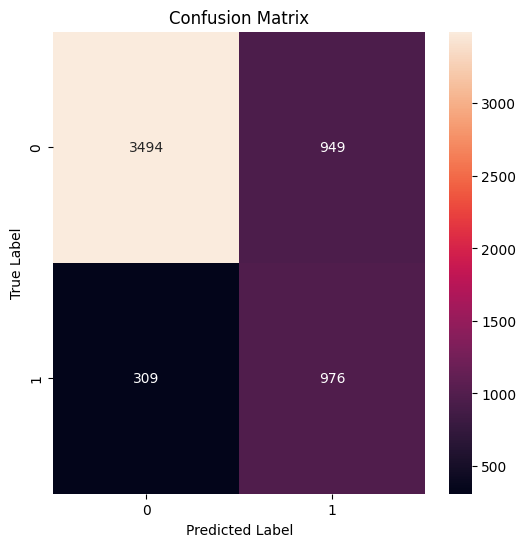

Classification Report:
              precision    recall  f1-score      support
0              0.918748  0.786406  0.847441  4443.000000
1              0.507013  0.759533  0.608100  1285.000000
accuracy       0.780377  0.780377  0.780377     0.780377
macro avg      0.712881  0.772969  0.727770  5728.000000
weighted avg   0.826381  0.780377  0.793748  5728.000000


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import torch

# Replace 'model' with 'model_enhanced' to use the enhanced model for evaluation
model_enhanced.eval()  # Set the enhanced model to evaluation mode
with torch.no_grad():
    # Forward pass
    y_test_pred = model_enhanced(X_test_tensor)
    # Get the prediction classes
    _, predicted_classes = torch.max(y_test_pred, 1)

# Calculate the classification report
report = classification_report(y_test_tensor.cpu(), predicted_classes.cpu(), output_dict=True)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_tensor.cpu(), predicted_classes.cpu())
cm_df = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print("Classification Report:")
print(pd.DataFrame(report).transpose())

## **Confusion Matrix:**

*   True Negatives (class 0 correctly predicted): 3457
*   False Positives (class 0 incorrectly predicted as class 1): 986
*   False Negatives (class 1 incorrectly predicted as class 0): 314
*   True Positives (class 1 correctly predicted): 971

---

## **Classification Report:**

* For class 0 (negative class), the precision is high at 91.67%, indicating a low rate of incorrectly predicting class 1.

* For class 1 (positive class), the precision is about 49.62%, showing that when the model predicts class 1, it is correct roughly half of the time.

* The recall for class 0 is 77.81%, meaning that the model correctly identifies 77.81% of all actual class 0 instances.

* The recall for class 1 is notably better at 75.56%, suggesting that the model has improved in identifying the positive class.

* The f1-score for class 0 is 84.17%, which is quite good, and for class 1, it's 59.90%, which is a decent score considering the precision.

* The accuracy of the model across both classes is 77.30%, which is an overall measure of the model's performance.


---



# **This indicates that the changes made to the model's architecture and the balancing of the dataset were beneficial and have led to better accurate model for the binary classification task.**